<a href="https://colab.research.google.com/github/Vamsikrishna1804/INFO-5502/blob/main/Assignment5_VamsiKrishnaBharghavaMuktinutalapati_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
!pip install datascience

In [ ]:
df=pd.read_csv('crime_rates.csv')
df

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.300003,10.2,20.799999,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003
1,Alaska,1961,234000,88.900002,11.5,13.200000,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003
2,Alaska,1962,246000,91.500000,4.5,18.700001,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006
3,Alaska,1963,248000,109.699997,6.5,14.900000,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012
4,Alaska,1964,250000,150.000000,10.4,22.400000,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,Wyoming,1999,480000,232.500000,2.3,28.600000,15.400000,186.199997,3225.199951,489.799988,2611.100098,124.300003
2196,Wyoming,2000,493782,266.500000,2.4,32.400002,14.200000,217.500000,3031.500000,420.799988,2494.600098,116.000000
2197,Wyoming,2001,494423,257.299988,1.8,30.900000,17.000000,207.500000,3260.399902,501.799988,2617.800049,140.800003
2198,Wyoming,2002,498830,273.399994,3.0,29.700001,18.600000,222.100006,3306.500000,490.700012,2666.800049,148.899994


In [ ]:
df.isnull().sum()

State                       0
Year                        0
Population                  0
Violent Crime Rate          0
Murder Rate                 0
Forcible Rape Rate          0
Robbery Rate                0
Aggraveted Assault Rate     0
Property Crime Rate         0
Burglary Rate               0
Larceny & Theft Rate        0
Motor Vehicle Theft Rate    0
dtype: int64

1.2) Draw a line plot with years on the horizontal axis and murder rates on the vertical axis.Include two lines:  one for Alaska murder rates and one for Minnesota murder rates.  Create this plotusing a single call:akmn.plot(’Year’).

In [ ]:
df=Table.read_table('crime_rates.csv').select('State','Year','Population','Murder Rate')
df.set_format("Population", NumberFormatter)



State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


In [ ]:
ak = df.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Alaska Murder rates')
mn = df.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Minnesota Murder rates')
ak_mn = ak.join('Year',mn)
ak_mn




Year,Alaska Murder rates,Minnesota Murder rates
1960,10.2,1.2
1961,11.5,1
1962,4.5,0.9
1963,6.5,1.2
1964,10.4,1.4
1965,6.3,1.4
1966,12.9,2.2
1967,9.6,1.6
1968,10.5,2.2
1969,10.6,1.9


Text(0, 0.5, 'Murder Rates')

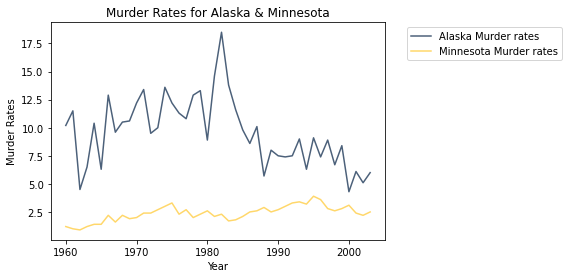

In [ ]:
ak_mn.plot('Year')
plt.title('Murder Rates for Alaska & Minnesota')
plt.xlabel('Year')
plt.ylabel('Murder Rates')

Question 1.3.Implement the functionmostmurderous, which takes a year (an integer) as its argument.It does two things:1.  It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.2.  It returns an array of the names of these states in order of increasing murder rate.

['Florida', 'Alabama', 'Mississippi', 'Alaska', 'Georgia']


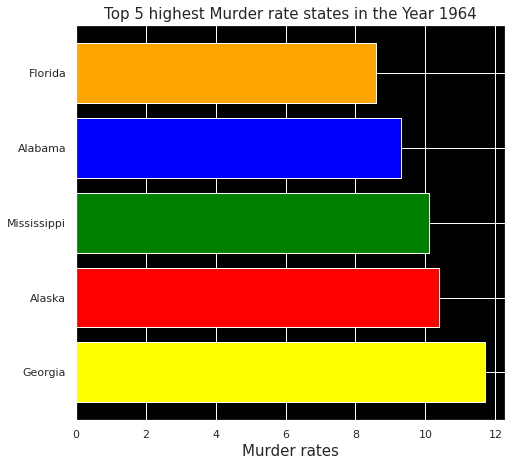

In [ ]:
state_list=[]
sns.set(rc={'figure.figsize':(7.7,7.27)})
def most_murderous(year):
    murder_rates=df.to_df()
    selected_year=murder_rates.loc[murder_rates["Year"]==year]
    selected_year=selected_year.sort_values("Murder Rate",ascending=False)
    selected_year=selected_year.head()
    barplot=plt.axes()
    barplot.set_facecolor('Black')
    plt.title("Top 5 highest Murder rate states in the Year {}".format(year),size=15)
    plt.xlabel("Murder rates",size=15)
    plt.barh(selected_year["State"],selected_year["Murder Rate"],color=['Yellow', 'red', 'green', 'blue', 'orange'])
    state_list=list(selected_year['State'])
    print(state_list[::-1])
                     

most_murderous(1964)

Question 1.4.How  many  more  people  were  murdered  in  California  in  1988  than  in  1975?   Assigncachangeto the answer.

In [ ]:
murder_rates=df.to_df()
california_1988=murder_rates[(murder_rates['State']=='California') & (murder_rates['Year']==1988)]
california_1975=murder_rates[(murder_rates['State']=='California') & (murder_rates['Year']==1975)]
no_of_murders=(int((california_1988["Murder Rate"]*california_1988["Population"])/100000)-int((california_1975["Murder Rate"]*california_1975["Population"])/100000))
print("{} more murders happened in the year 1988 than in 1975".format(no_of_murders))

726 more murders happened in the year 1988 than in 1975


Question 2.1.  Implement the function twoyearchanges that takes an array of murder rates for a state,ordered by increasing year.  For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number of decreases.

In [ ]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

In [ ]:
def two_year_changes(rates):
  win_rate=diff_n(rates,2)
  greater_than_zero=0
  less_than_zero=0
  for item in win_rate:
    if item>0:
      greater_than_zero+=1
    elif item<0:
      less_than_zero+=1
    else:
      pass
  return greater_than_zero-less_than_zero

print('Alaska:',    two_year_changes(ak.column('Alaska Murder rates')))
print('Minnesota:', two_year_changes(mn.column('Minnesota Murder rates')))



Alaska: -5
Minnesota: 6


             State  Murder Rate two_year_changes
24         Alabama                            -6
40          Alaska                            -5
34         Arizona                             1
22        Arkansas                            -1
18      California                            17
20        Colorado                            -4
25     Connecticut                             4
48        Delaware                            -3
49         Florida                            -6
33         Georgia                            -3
15          Hawaii                            -2
10           Idaho                            -3
31        Illinois                             8
16         Indiana                             5
0             Iowa                             4
14          Kansas                             5
23        Kentucky                            -6
30       Louisiana                             8
21           Maine                             5
12        Maryland  

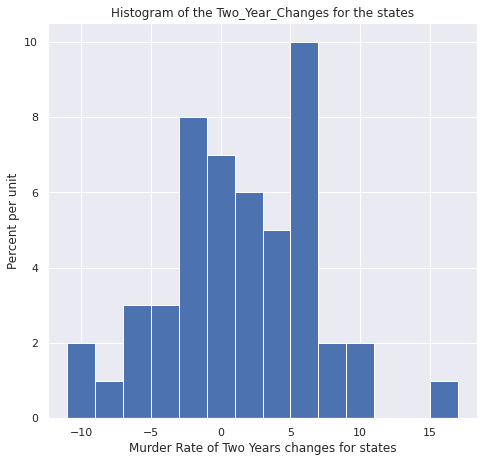

0      4
1    -10
2      3
3      1
4      6
5      1
6     -8
7      2
8     -4
9      3
10    -3
11     6
12     9
13     0
14     5
15    -2
16     5
17    -1
18    17
19    -1
20    -4
21     5
22    -1
23    -6
24    -6
25     4
26    -3
27     0
28     6
29    -2
30     8
31     8
32   -11
33    -3
34     1
35    -3
36     1
37     5
38     5
39     2
40    -5
41    10
42     5
43    -2
44     0
45     3
46    -1
47     5
48    -3
49    -6
Name: Murder Rate two_year_changes, dtype: int64

In [ ]:
#2.2 Question 2.2.Assignchangesbystateto a table with one row per state that has two columns:  theState name and the Murder Ratetwoyearchangesstatistic computed across all years in our data setfor that state.
state=[]
def changes_by_state():
  changeRate=[]
  murder_rates=df.to_df()
  two_year_changes_df=pd.DataFrame()  
  for st in set(murder_rates['State']):
    rate=murder_rates.loc[murder_rates['State']==st,'Murder Rate']
    new_rate=two_year_changes(rate)
    state.append(st)
    changeRate.append(new_rate)
  two_year_changes_df['State']=state
  two_year_changes_df['Murder Rate two_year_changes']=changeRate
  print(two_year_changes_df.sort_values('State'))
  two_year_changes_df.hist("Murder Rate two_year_changes", bins=np.arange(-11, 19, 2))
  plt.title('Histogram of the Two_Year_Changes for the states')
  plt.xlabel('Murder Rate of Two Years changes for states')
  plt.ylabel('Percent per unit')
  plt.show()
  return two_year_changes_df['Murder Rate two_year_changes']

changes_by_state()

Question 2.3. Assign total_changes to the total increases minus the total decreases for all two-year periods and all states in our data set.

             State  Murder Rate two_year_changes
24         Alabama                            -6
40          Alaska                            -5
34         Arizona                             1
22        Arkansas                            -1
18      California                            17
20        Colorado                            -4
25     Connecticut                             4
48        Delaware                            -3
49         Florida                            -6
33         Georgia                            -3
15          Hawaii                            -2
10           Idaho                            -3
31        Illinois                             8
16         Indiana                             5
0             Iowa                             4
14          Kansas                             5
23        Kentucky                            -6
30       Louisiana                             8
21           Maine                             5
12        Maryland  

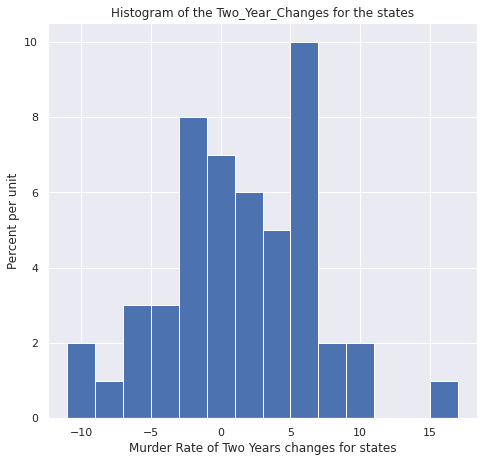

total_changes is 45


In [ ]:
changes=changes_by_state()
print('total_changes is {}'.format(sum(changes)))

In [ ]:
#2.4 Question 2.4.Setnumchangesto the number of different two-year periods in the entire data set thatcould result in a change of a state’s murder rate.  Include both those periods where a change occurredand the periods where a state’s rate happened to stay the same.
state=list(set(state))
pds = make_array() 
for i in np.arange(len(state)): 
    pd = df.where("State", state[i]).num_rows-2 
    pds = np.append(pds, pd) 
    
num_changes1 = sum(pds)
print("Num_changes :",num_changes1)

Num_changes : 2100.0


In [ ]:
#2.5 Question 2.5.  Given these null and alternative hypotheses, define a good test statistic.
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 100)

Change,Chance,Chance sample
Increase,0.5,45
Decrease,0.5,55


In [ ]:
# 2.6. Complete the simulation below, which samples num_changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis

def simulate_under_null(num_chances_to_change):
    return uniform.sample_from_distribution('Chance', 100).column(2).item(0) - uniform.sample_from_distribution('Chance', 100).column(2).item(1)

uniform_samples = make_array()
for i in np.arange(5000):
    uniform_samples = np.append(uniform_samples, simulate_under_null(num_changes1)) 

simulated_changes = Table().with_column('Test statistic under null', uniform_samples) 
simulated_changes

Test statistic under null
6
11
-20
-3
-2
-7
-3
4
-6
-13


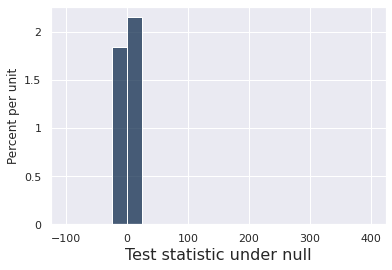

In [ ]:
#2.7 Question 2.7.Looking  at  this  histogram,  draw  a  conclusion  about  whether  murder  rates  basicallyincrease as often as they decrease.
simulated_changes.hist(0, bins=np.arange(-100, 400+25, 25))

Question 3.2.We want to know whether the death penalty causes a change in the murder rate.  Whyis it not sufficient to compare murder rates in places and times when the death penalty was in force withplaces and times when it wasn’t?

In [ ]:
# 3.2. knowing whether the death penalty causes a change in the murder rate

non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = df.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

State,Death Penalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True


In [ ]:
num_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows
num_death_penalty_states

44

Question 3.3.Assigndeathpenaltymurderratesto a table with the same columns and data asmurderrates, but that has only the rows for states that had the death penalty in 1971.

In [ ]:
death_penalty_murder_rates = df.where("State" , are.not_contained_in (non_death_penalty_states))
death_penalty_murder_rates

State,Year,Population,Murder Rate
Alabama,1960,"3,266,740",12.4
Alabama,1961,"3,302,000",12.9
Alabama,1962,"3,358,000",9.4
Alabama,1963,"3,347,000",10.2
Alabama,1964,"3,407,000",9.3
Alabama,1965,"3,462,000",11.4
Alabama,1966,"3,517,000",10.9
Alabama,1967,"3,540,000",11.7
Alabama,1968,"3,566,000",11.8
Alabama,1969,"3,531,000",13.7


Question 3.4.  Assignchanges72to the value of the test statistic for the years 1971 to 1973 and thestates indeathpenaltymurderrates.

In [ ]:
win_rate=[]
valid_states = death_penalty.where(1, True). column(0)
year = death_penalty_murder_rates.where('Year', are.contained_in(make_array(1971, 1973)))
increases_decreases = make_array()
greater_than_zero=0
less_than_zero=0
print(valid_states)
for x in np.arange(len(valid_states)):
    state= valid_states.item(x)
    change = np.diff(year.where('State', state).column('Murder Rate'))
    win_rate.append(change)
for item in win_rate:
    if item>0:
      greater_than_zero+=1
    elif item<0:
      less_than_zero+=1
    else:
      pass
test_stat_72 = greater_than_zero-less_than_zero
print('Increases minus decreases from 1971 to 1973:', test_stat_72)

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Florida' 'Georgia' 'Idaho' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Louisiana' 'Maryland' 'Massachuse' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Isla' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wyoming']
Increases minus decreases from 1971 to 1973: 22


Text(0.5, 1.0, 'Histogram of the statistic under the null hypothesis')

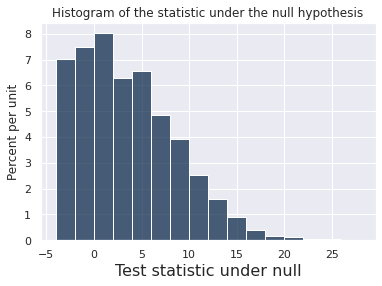

In [ ]:
#3.5 Question 3.5.Draw an empirical histogram of the statistic under the null hypothesis by simulatingthe test statistic 5,000 times.
samples = make_array()
for i in np.arange(5000):
    samples = np.append(samples, simulate_under_null(44))
# Feel free to change the bins if they don't make sense for your test statistic.
Table().with_column('Test statistic under null', samples).hist(bins=np.arange(-4, 28+2, 2))
plt.title('Histogram of the statistic under the null hypothesis')

In [ ]:
#3.6 Question Complete the analysis as follows:1.  Compute a P-value.
p = np.count_nonzero(samples>=test_stat_72)/5000
p

0.0014

In [ ]:
#4.1 Question 4.1.Implementruntest, which takes the following arguments:•A table of murder rates for certain states, sorted by state and year likemurderrates, and•the year when the analysis starts.  (The comparison group is two years later.)
def run_test(rates, start_year):
    num_states = rates.group('State').num_rows
    end_year = start_year + 2
    table_yrs = rates.where('Year', are.contained_in(make_array(start_year, end_year)))
    win_rate=[]
    greater_than_zero=0
    less_than_zero=0
    
    for i in np.arange(num_states):
        states = table_yrs.sort('State', distinct = True).column('State')
        state= states.item(i)
        change = np.diff(table_yrs.where('State', state).column('Murder Rate'))
        win_rate.append(change)
        
    for item in win_rate:
      if item>0:
        greater_than_zero+=1
      elif item<0:
        less_than_zero+=1
      else:
        pass
    observed_test_statistic = greater_than_zero - less_than_zero
    
    samples = make_array()
    for i in np.arange(5000):
        samples = np.append(samples, simulate_under_null(num_states))
        
    num_above_test_stat = np.count_nonzero(samples >= observed_test_statistic)
    num_below_test_stat = np.count_nonzero(samples <= observed_test_statistic)
    
    if observed_test_statistic > 0:
        p_value = num_above_test_stat/5000
    elif observed_test_statistic < 0:
        p_value = num_below_test_stat/5000
        
    
    print('Test statistic', start_year, 'to', end_year, ':', observed_test_statistic)
    return p_value
    
run_test(death_penalty_murder_rates, 1971)
p

Test statistic 1971 to 1973 : 22


0.0014

In [ ]:
#5.1 Question 5.1.Create a table calledaveragemurderrateswith 1 row for each year inmurderrates.  Itshould have 3 columns:
import pandas as pnd
valid_states_df=df_pd.loc[df_pd['State'].isin(valid_states)]
valid_states_df=pd.DataFrame(valid_states_df.groupby('Year')['Murder Rate'].mean())
invalid_states_df=df_pd.loc[df_pd['State'].isin(non_death_penalty_states)]
invalid_states_df=pd.DataFrame(invalid_states_df.groupby('Year')['Murder Rate'].mean())
valid_states_df.reset_index()
invalid_states_df.reset_index()
average_murder_rates=valid_states_df.merge(invalid_states_df,on='Year')
average_murder_rates=average_murder_rates.reset_index()
average_murder_rates.columns=['Year','Death states','Non death states']
print(average_murder_rates)

    Year  Death states  Non death states
0   1960      5.279545          3.550000
1   1961      4.777273          3.683333
2   1962      4.615909          2.333333
3   1963      4.613636          2.750000
4   1964      4.711364          3.400000
5   1965      4.827273          3.183333
6   1966      5.431818          4.516667
7   1967      5.875000          3.733333
8   1968      6.270455          4.733333
9   1969      6.502273          4.733333
10  1970      7.147727          5.116667
11  1971      7.513636          6.066667
12  1972      7.765909          6.300000
13  1973      8.120455          5.800000
14  1974      8.554545          7.300000
15  1975      8.454545          6.866667
16  1976      7.552273          6.100000
17  1977      7.659091          5.866667
18  1978      7.752273          6.233333
19  1979      8.279545          6.350000
20  1980      8.463636          6.016667
21  1981      8.129545          6.250000
22  1982      7.588636          6.366667
23  1983      6.

Text(0, 0.5, 'Mean Rate')

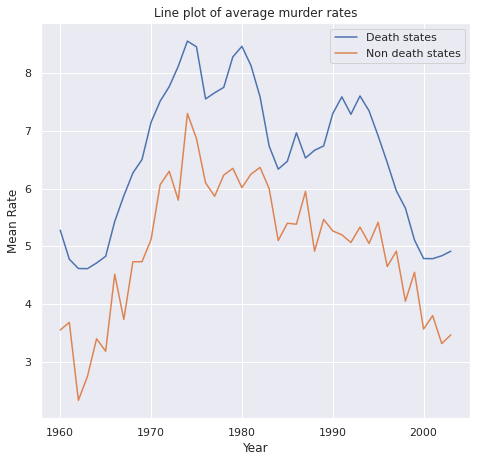

In [ ]:
#5.2 Question 5.2.Describe in one short sentence a high-level takeaway from the line plot below.  Are themurder rates in these two groups of states related?averagemurderrates.plot(’Year’).6
average_murder_rates.plot('Year')
plt.title('Line plot of average murder rates')
plt.xlabel('Year')
plt.ylabel('Mean Rate')

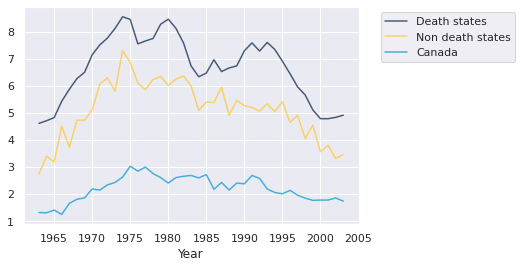

In [ ]:
#5.3 Question 5.3.Complete their argument in 2-3 sentences;  what features of these plots indicate thatthe death penalty is not an important factor in determining the murder rate?  (If you’re stuck, read thepaper.)
canada = Table.read_table('canada.csv')
average_murder_rates=Table.from_df(average_murder_rates)
murder_rates_with_canada = average_murder_rates.join("Year", canada.select("Year", "Homicide").relabeled("Homicide", "Canada"))
murder_rates_with_canada.plot('Year')